In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
(X_train,_),(X_test,_)=mnist.load_data()

In [3]:
X_train=X_train/255.
X_test=X_test/255.

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train.min(),X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, 0.0, 1.0)

In [43]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [44]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [45]:
autoencoder=Sequential([encoder,decoder])

In [46]:
autoencoder.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_15 (Sequential)   (None, 25)                420625    
_________________________________________________________________
sequential_16 (Sequential)   (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [47]:
autoencoder.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [48]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1709 - accuracy: 0.1811 - val_loss: 0.1328 - val_accuracy: 0.2210
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1254 - accuracy: 0.2353 - val_loss: 0.1176 - val_accuracy: 0.2441
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1159 - accuracy: 0.2507 - val_loss: 0.1127 - val_accuracy: 0.2536
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.2597 - val_loss: 0.1091 - val_accuracy: 0.2563
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1076 - accuracy: 0.2663 - val_loss: 0.1062 - val_accuracy: 0.2707
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1046 - accuracy: 0.2724 - val_loss: 0.1032 - val_accuracy: 0.2730
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1024 - accuracy: 0.2765 - val_loss: 0.1020 - val_accuracy:

Text(0.5, 0.98, 'Origin')

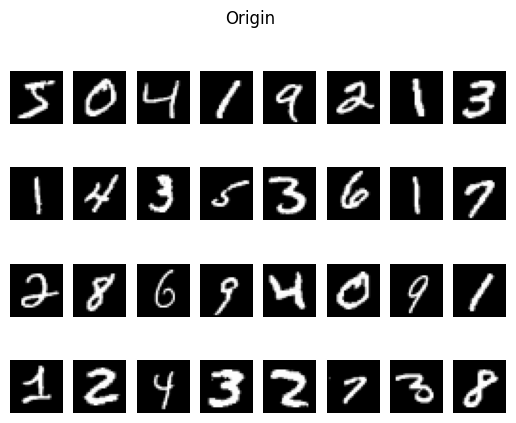

In [56]:
# Test first 32 images
first_32=X_train[:32]
k=1
while k<33:
    plt.subplot(4,8,k)
    plt.imshow(first_32[k-1],cmap='grey')
    plt.axis('off')
    k+=1
plt.suptitle('Origin')

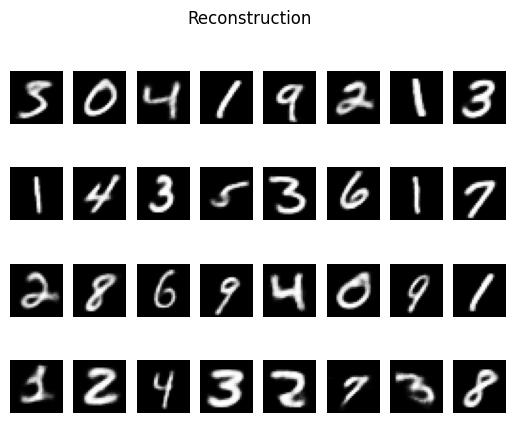

In [55]:
recon_imgs=autoencoder.predict(first_32)
k=1
while k<33:
    plt.subplot(4,8,k)
    plt.imshow(recon_imgs[k-1],cmap='grey')
    plt.axis('off')
    k+=1
plt.suptitle('Reconstruction')
plt.show()

### try with MSE

In [37]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(320,activation='relu'))
encoder.add(Dense(160,activation='relu'))
encoder.add(Dense(80,activation='relu'))
encoder.add(Dense(40,activation='relu'))

In [38]:
decoder=Sequential()
decoder.add(Dense(80,input_shape=[40],activation='relu'))
decoder.add(Dense(160,activation='relu'))
decoder.add(Dense(320,activation='relu'))
decoder.add(Dense(784))
decoder.add(Reshape([28,28]))

In [39]:
autoencoder2=Sequential([encoder,decoder])

In [40]:
autoencoder2.compile(loss='mse',optimizer=Adam(),metrics=['mse'])

In [41]:
autoencoder2.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

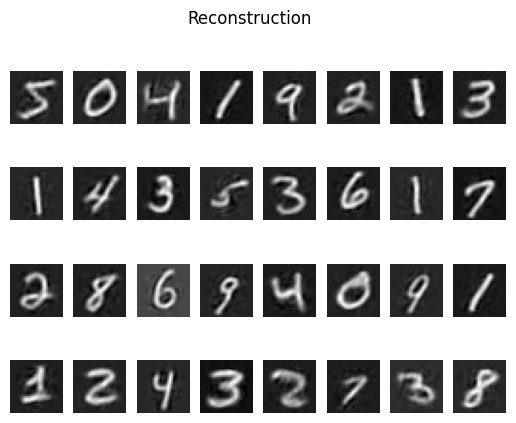

In [53]:
recon_imgs=autoencoder2.predict(first_32)
k=1
while k<33:
    plt.subplot(4,8,k)
    plt.imshow(recon_imgs[k-1],cmap='grey')
    plt.axis('off')
    k+=1
plt.suptitle('Reconstruction')
plt.show()